# DataSet

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('path of car rental')

# Display the first few rows to inspect the dataset
print(df.head())




   fuelType  rating  renterTripsTaken  reviewCount location.city  \
0  ELECTRIC    5.00                13           12       Seattle   
1  ELECTRIC    5.00                 2            1       Tijeras   
2    HYBRID    4.92                28           24   Albuquerque   
3  GASOLINE    5.00                21           20   Albuquerque   
4  GASOLINE    5.00                 3            1   Albuquerque   

  location.country  location.latitude  location.longitude location.state  \
0               US          47.449107         -122.308841             WA   
1               US          35.111060         -106.276551             NM   
2               US          35.127163         -106.566681             NM   
3               US          35.149726         -106.711425             NM   
4               US          35.208659         -106.601008             NM   

   owner.id  rate.daily vehicle.make vehicle.model vehicle.type  vehicle.year  
0  12847615         135        Tesla       Model X    

In [ ]:
# Get basic information about the dataset (columns, data types, missing values, etc.)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5776 non-null   object 
 1   rating              5350 non-null   float64
 2   renterTripsTaken    5851 non-null   int64  
 3   reviewCount         5851 non-null   int64  
 4   location.city       5851 non-null   object 
 5   location.country    5851 non-null   object 
 6   location.latitude   5851 non-null   float64
 7   location.longitude  5851 non-null   float64
 8   location.state      5851 non-null   object 
 9   owner.id            5851 non-null   int64  
 10  rate.daily          5851 non-null   int64  
 11  vehicle.make        5851 non-null   object 
 12  vehicle.model       5851 non-null   object 
 13  vehicle.type        5851 non-null   object 
 14  vehicle.year        5851 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 685.8+

In [ ]:
# Get a summary of numeric columns
df.describe()

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
count,5350.000000,5851.000000,5851.000000,5851.000000,5851.000000,5.851000e+03,5851.000000,5851.000000
mean,4.920325,33.477354,28.454794,35.582889,-99.632773,6.034830e+06,93.691506,2015.340113
std,0.182425,41.898954,35.136113,6.431408,20.391476,4.646022e+06,96.080920,4.050813
min,1.000000,0.000000,0.000000,21.272565,-158.165693,5.105000e+03,20.000000,1955.000000
25%,4.900000,5.000000,4.000000,30.453623,-117.158285,1.917451e+06,45.000000,2014.000000
50%,5.000000,18.000000,16.000000,35.554502,-95.673319,4.968749e+06,69.000000,2016.000000
75%,5.000000,46.000000,39.000000,39.996864,-81.538631,9.657496e+06,110.000000,2018.000000
max,5.000000,395.000000,321.000000,64.893610,-68.823637,1.581088e+07,1500.000000,2020.000000


# Handling Missing Values

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 fuelType               75
rating                501
renterTripsTaken        0
reviewCount             0
location.city           0
location.country        0
location.latitude       0
location.longitude      0
location.state          0
owner.id                0
rate.daily              0
vehicle.make            0
vehicle.model           0
vehicle.type            0
vehicle.year            0
dtype: int64


In [ ]:
import numpy as np

# Impute `fuelType`
# 1. Get the mode of fuelType
fuelType_mode = df['fuelType'].mode()[0]

# 2. Create a mapping of fuel types and their frequencies
fuelType_counts = df['fuelType'].value_counts(normalize=True)
fuelType_categories = fuelType_counts.index.tolist()
fuelType_probabilities = fuelType_counts.values.tolist()

# 3. Randomly choose from existing categories based on their frequencies for missing values
missing_fuelType_indices = df['fuelType'].isnull()  # Boolean mask for missing values
num_missing = missing_fuelType_indices.sum()  # Count of missing values

if num_missing > 0:
    # Randomly select from the available categories based on their frequencies
    df.loc[missing_fuelType_indices, 'fuelType'] = np.random.choice(
        fuelType_categories,
        size=num_missing,
        p=fuelType_probabilities
    )


In [ ]:
# Impute `rating`

# Fill missing `rating` values with random numbers between 2.5 and 3.5
rating_min = 2.5
rating_max = 3.5

# Create a mask for missing ratings
missing_rating_indices = df['rating'].isnull()

# Assign random values between 2.5 and 3.5 to missing rating values
df.loc[missing_rating_indices, 'rating'] = np.random.uniform(rating_min, rating_max, size=missing_rating_indices.sum())


In [ ]:
# Check the dataset after imputation
print("updated")
print(df.isnull().sum())

# Optionally, save the updated dataset
output_file_path = '/content/CarRentalData_Imputed.csv'
df.to_csv(output_file_path, index=False)

print(f"Imputed dataset saved to {output_file_path}")

updated
fuelType              0
rating                0
renterTripsTaken      0
reviewCount           0
location.city         0
location.country      0
location.latitude     0
location.longitude    0
location.state        0
owner.id              0
rate.daily            0
vehicle.make          0
vehicle.model         0
vehicle.type          0
vehicle.year          0
dtype: int64
Imputed dataset saved to /content/CarRentalData_Imputed.csv


# Feature Engineering

In [ ]:
import pandas as pd


# Load your dataset
df = pd.read_csv('/content/CarRentalData_Imputed.csv')


In [ ]:
# Step 1: Remove specified columns
columns_to_remove = [
    'location.country', 'location.longitude', 'location.latitude',
    'owner.id', 'vehicle.year', 'reviewCount', 'location.city','vehicle.model'
]
df.drop(columns=columns_to_remove, errors='ignore', inplace=True)


In [ ]:
# Step 3: Group by 'fuelType', 'location.state', 'vehicle.make', 'vehicle.type'
grouped_df = df.groupby(
    ['fuelType', 'location.state', 'vehicle.make', 'vehicle.type']
).agg({
    'renterTripsTaken': 'sum',   # Sum of renter trips
    'rating': 'mean',            # Average rating
    'rate.daily': 'mean'         # Average daily rate
}).reset_index()


In [ ]:
# Step 4: Save the grouped dataset to a CSV file
output_file_path = '/content/grouped_data.csv'
grouped_df.to_csv(output_file_path, index=False)

# Print the first few rows of the grouped dataset
print(grouped_df.head())

print(f"Grouped dataset saved to {output_file_path}")


  fuelType location.state   vehicle.make vehicle.type  renterTripsTaken  \
0   DIESEL             AK           Audi          suv                 3   
1   DIESEL             AL  Mercedes-Benz          van                 6   
2   DIESEL             AZ           Audi          suv                14   
3   DIESEL             CA            BMW          car                17   
4   DIESEL             CA            BMW          suv                91   

     rating  rate.daily  
0  5.000000   85.000000  
1  5.000000  133.000000  
2  4.920000   62.000000  
3  5.000000   90.000000  
4  4.936667   90.333333  
Grouped dataset saved to /content/grouped_data.csv


In [ ]:

# Check for missing values in the dataset
missing_values = grouped_df.isnull().sum()
missing_values[missing_values > 0]  # Display only columns with missing values

,0


In [ ]:
grouped_df.describe()

,renterTripsTaken,rating,rate.daily
count,1663.000000,1663.000000,1663.000000
mean,117.784726,4.725378,97.173373
std,282.754933,0.518553,107.074094
min,0.000000,2.524575,20.000000
25%,9.500000,4.752255,47.450000
50%,40.000000,4.940000,68.666667
75%,108.000000,5.000000,105.000000
max,4389.000000,5.000000,1500.000000


# CAR RENTAL DATA ANALYSIS


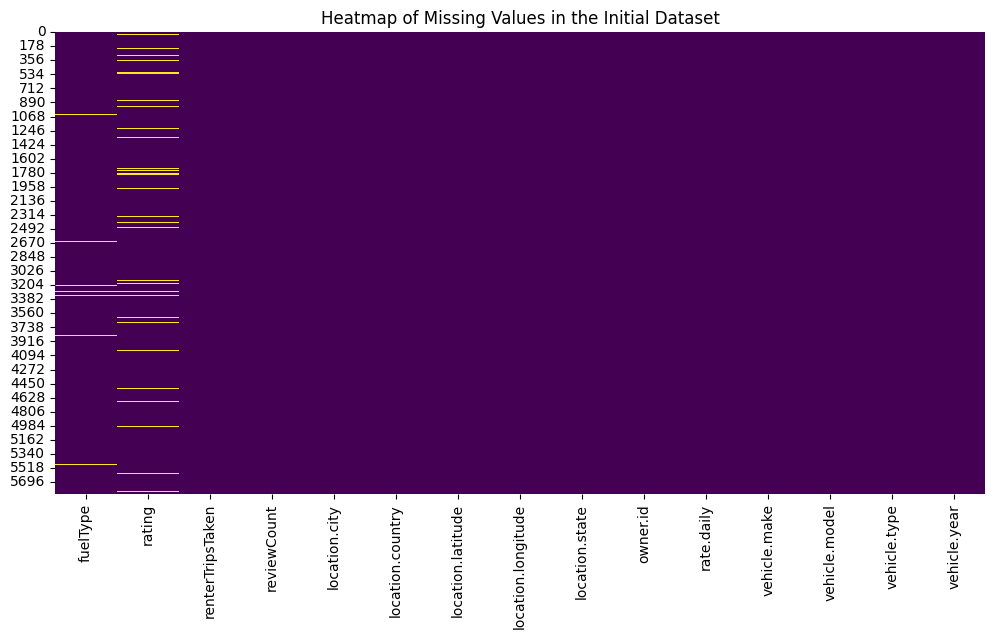

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/CarRentalData.csv')
# Check for missing values in the dataset
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in the Initial Dataset')
plt.show()


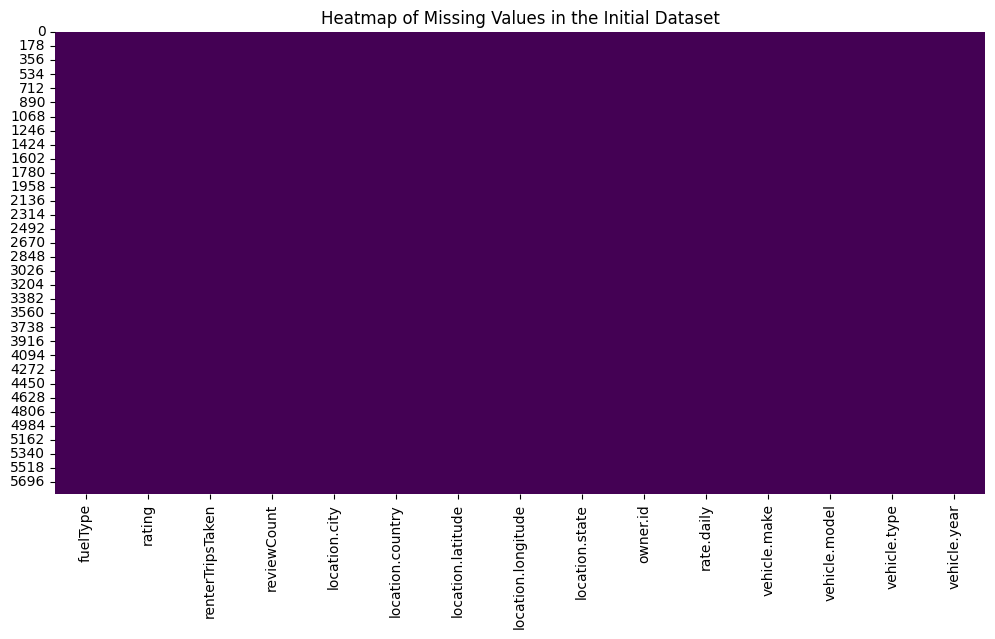

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/CarRentalData_Imputed.csv')
# Check for missing values in the dataset
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in the Initial Dataset')
plt.show()


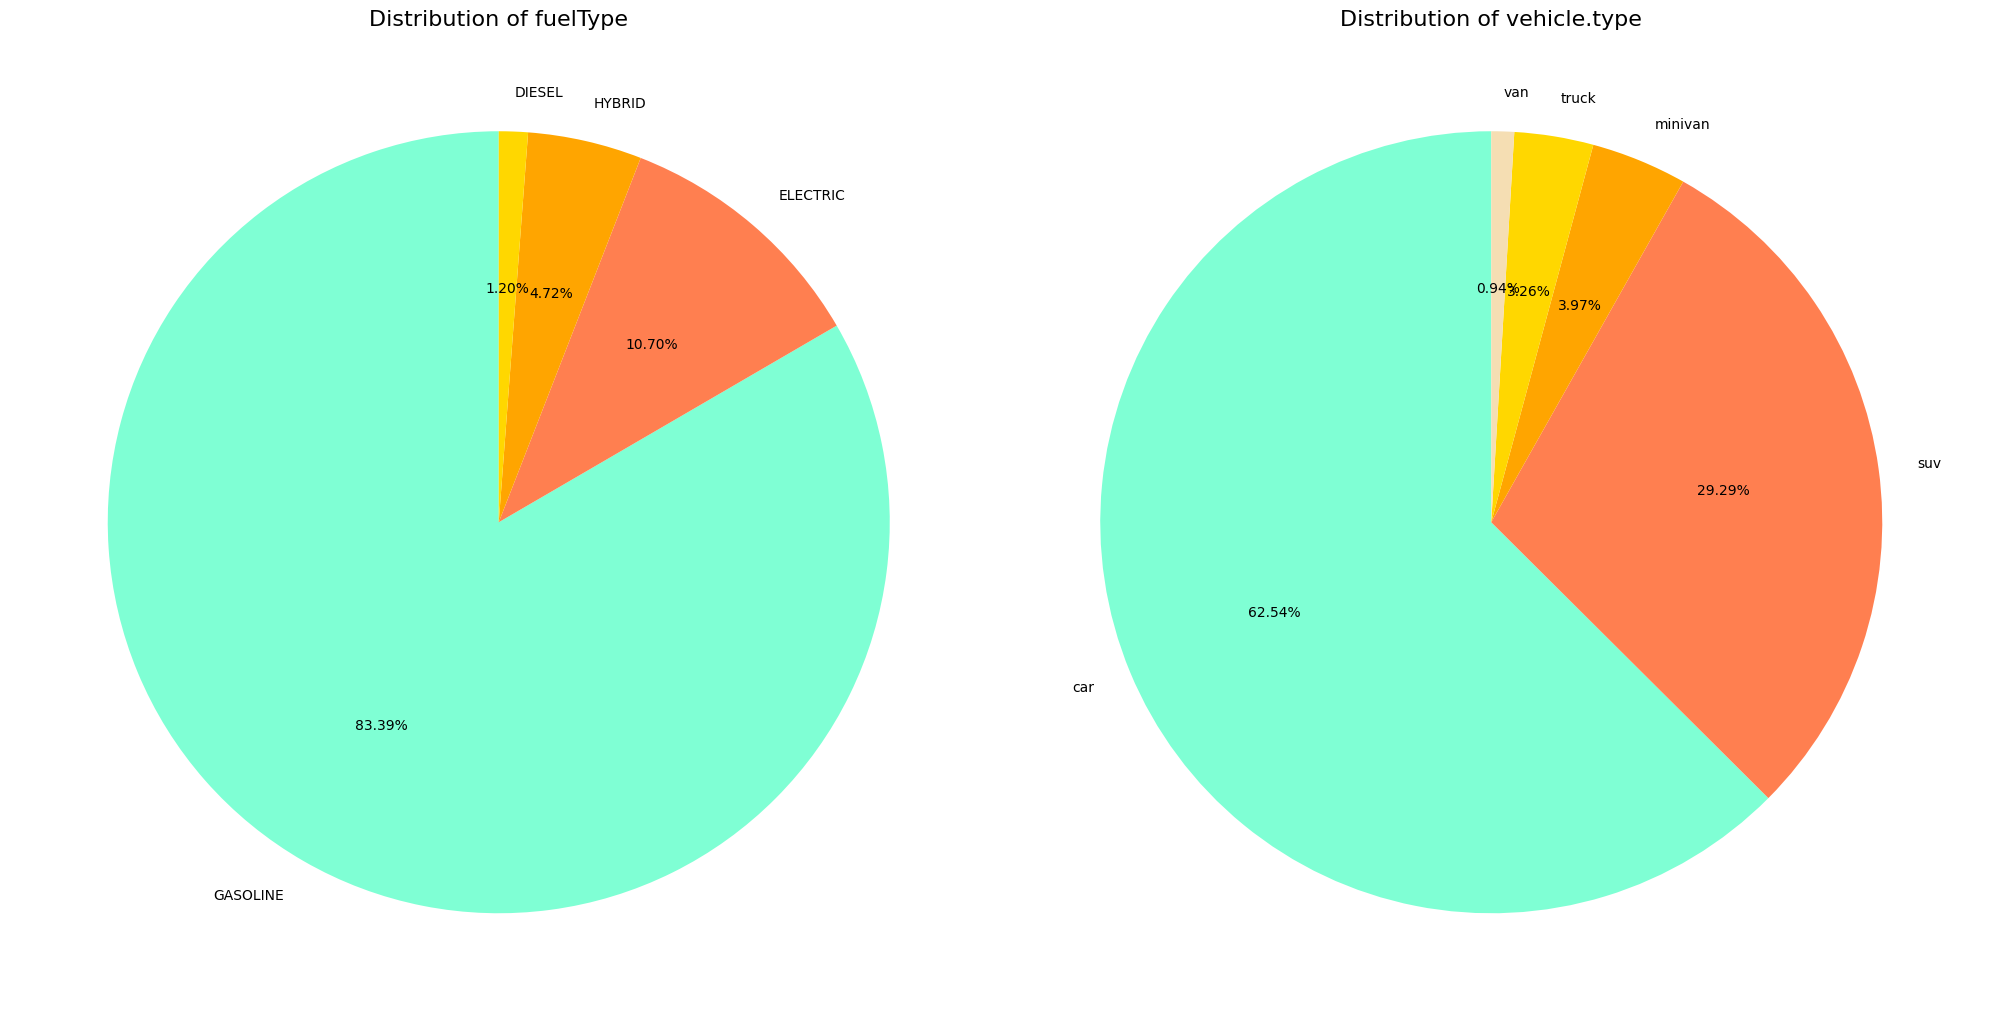

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/CarRentalData_Imputed.csv')

# Define colors for the pie charts
colors = ['aquamarine', 'coral', 'orange', 'gold', 'wheat']

# Define the columns for which to create pie charts
columns = ['fuelType', 'vehicle.type']

# Create a figure for the pie charts
plt.figure(figsize=(20, 12))

# Loop through each column and create a pie chart
for i, col in enumerate(columns):
    axes = plt.subplot(1, 2, i + 1)  # Adjust the layout for 2 pie charts in one row
    df[col].value_counts().plot.pie(
        autopct='%.2f%%',  # Format the percentage
        colors=colors,  # Set the colors
        ax=axes,  # Specify the current axes
        startangle=90,  # Start angle for the pie chart
        ylabel='',  # Remove y-label for better visualization
        legend=False  # Hide legend
    )
    plt.title(f'Distribution of {col}', fontsize=16)  # Set title for each pie chart

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
# Crosstab for State and Vehicle_Type
state_vehicle_type = pd.crosstab(df['location.state'], df['vehicle.type'])

# Crosstab for State and Vehicle_Make
state_vehicle_make = pd.crosstab(df['location.state'], df['vehicle.make'])


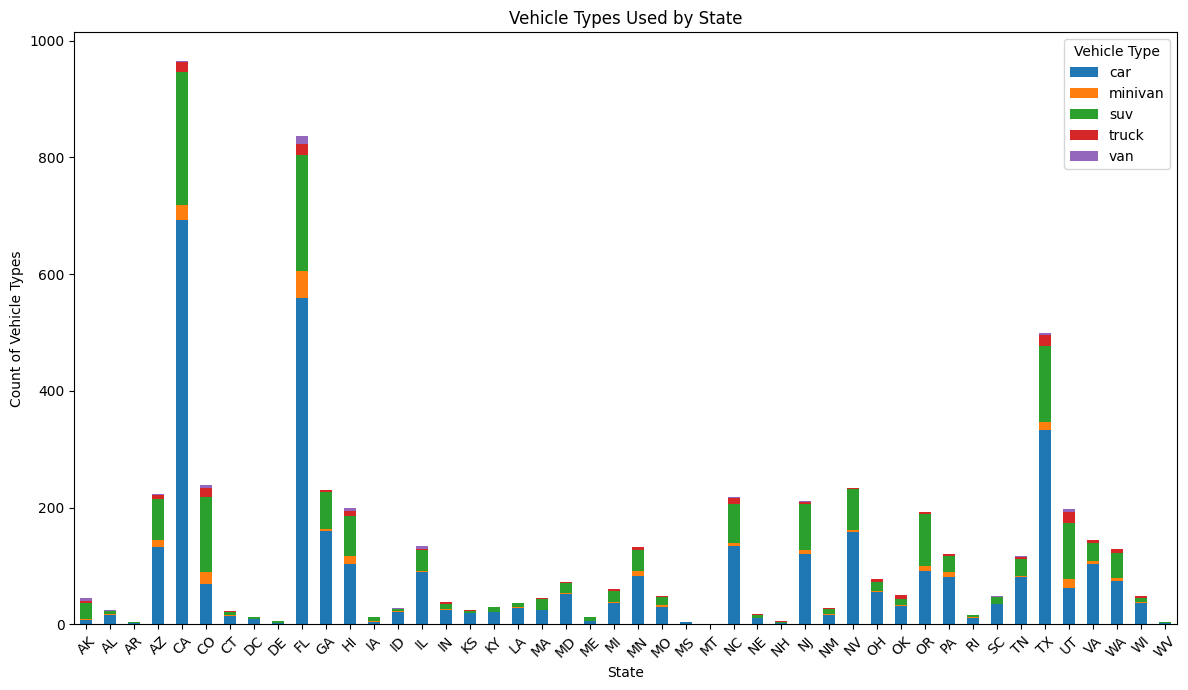

In [ ]:
import matplotlib.pyplot as plt

# Plot Stacked Bar Chart for Vehicle Types per State
state_vehicle_type.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Vehicle Types Used by State')
plt.xlabel('State')
plt.ylabel('Count of Vehicle Types')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()


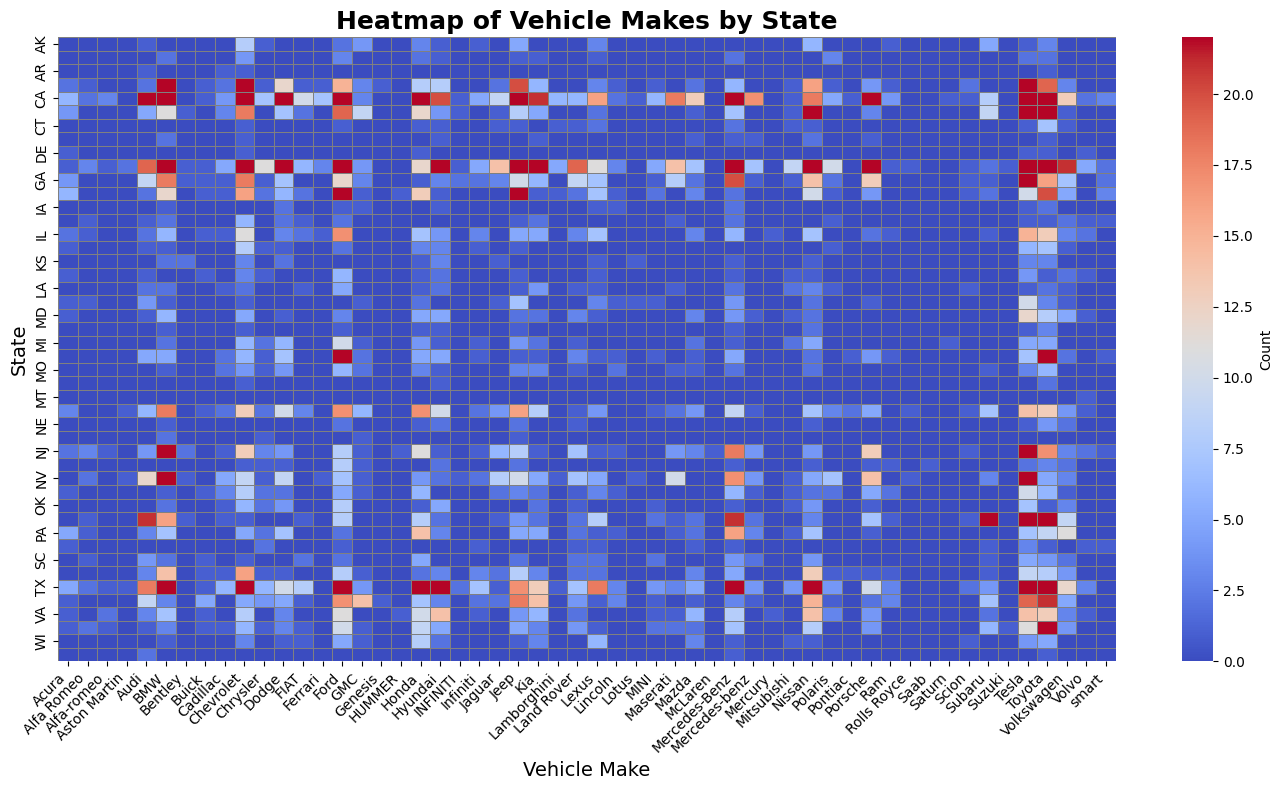

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the plot size for clarity and make the heatmap visually appealing
plt.figure(figsize=(14, 8))

# Generate the heatmap with improved aesthetics
sns.heatmap(state_vehicle_make,
            annot=False,  # Set to True if you want annotations for each cell
            cmap='coolwarm',  # You can try different palettes like 'viridis', 'YlGnBu', 'coolwarm'
            linewidths=0.5,
            linecolor='gray',  # Add gridlines for distinction
            cbar_kws={'label': 'Count'},  # Customize the color bar
            robust=True  # Handle outliers in data better
           )

# Customize the title and axis labels
plt.title('Heatmap of Vehicle Makes by State', fontsize=18, fontweight='bold')
plt.xlabel('Vehicle Make', fontsize=14)
plt.ylabel('State', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust y-axis labels if necessary
plt.yticks(fontsize=10)

# Add layout tightness for better space management
plt.tight_layout()

# Display the heatmap
plt.show()


<ipython-input-15-6bc8431cdbdd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


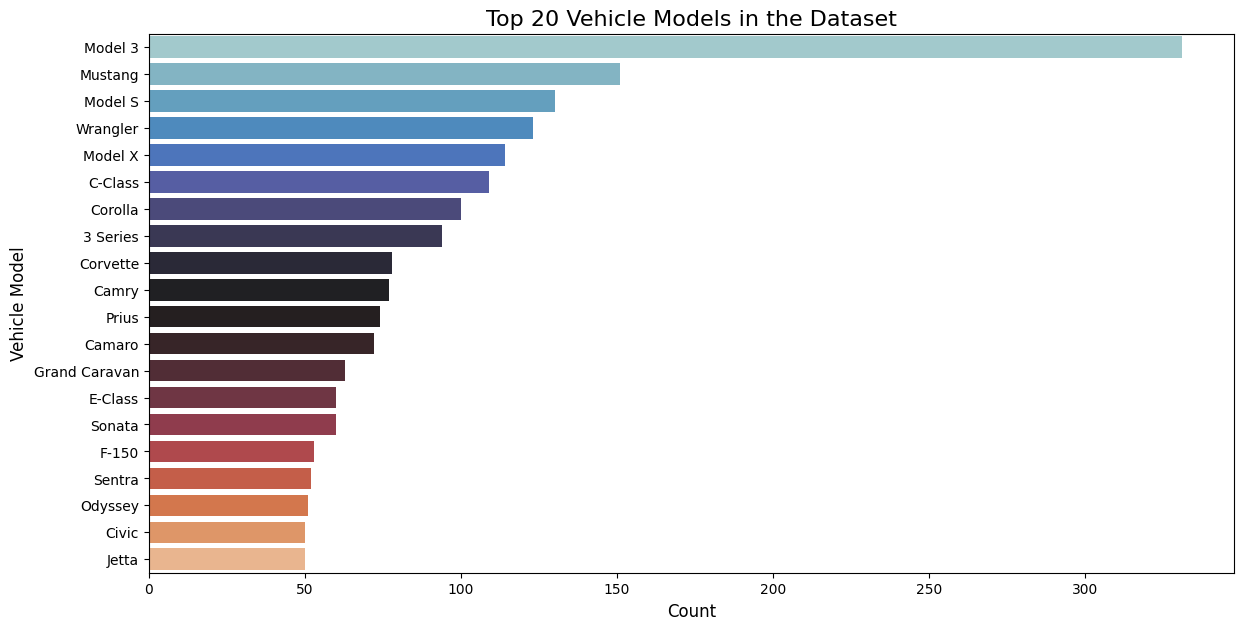

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(14, 7))

# Create a count plot for the top 20 vehicle models
sns.countplot(
    y='vehicle.model',  # Use the vehicle.model column for the y-axis
    data=df,  # Specify the DataFrame
    order=df['vehicle.model'].value_counts().index[:20],  # Order by the top 20 models
    palette='icefire'  # Use the 'icefire' color palette
)

# Set the title and labels
plt.title('Top 20 Vehicle Models in the Dataset', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Vehicle Model', fontsize=12)

# Display the plot
plt.show()

<ipython-input-16-a146451735eb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


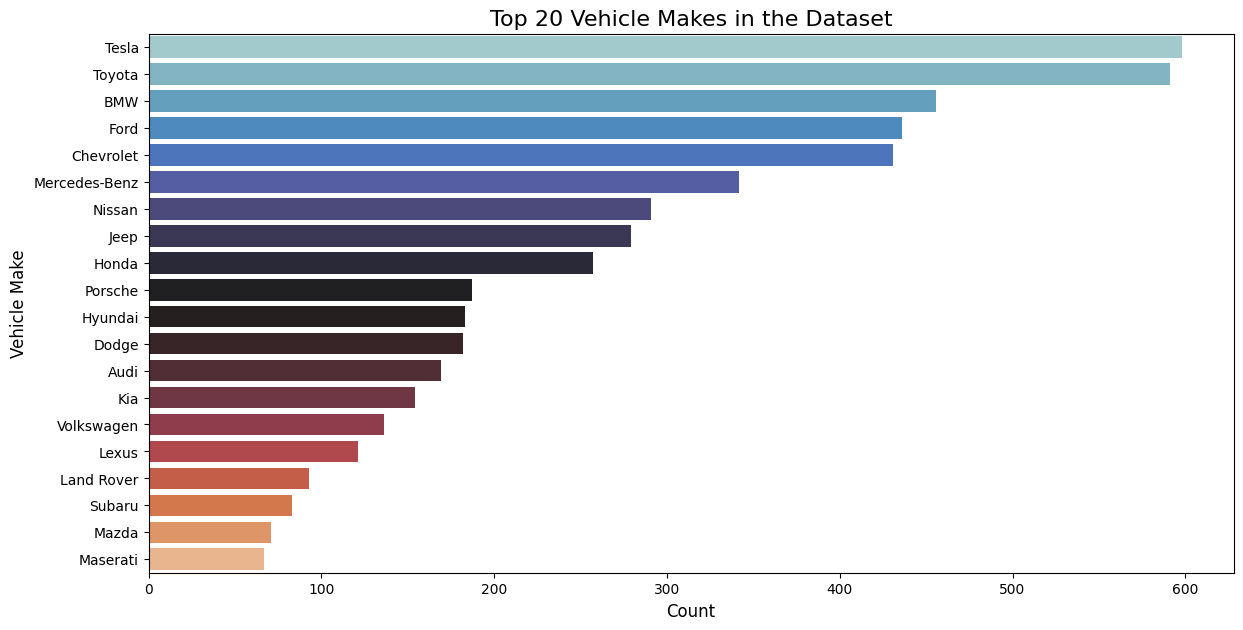

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(14, 7))

# Create a count plot for the top 20 vehicle makes
sns.countplot(
    y='vehicle.make',  # Use the vehicle.make column for the y-axis
    data=df,  # Specify the DataFrame
    order=df['vehicle.make'].value_counts().index[:20],  # Order by the top 20 makes
    palette='icefire'  # Use the 'icefire' color palette
)

# Set the title and labels
plt.title('Top 20 Vehicle Makes in the Dataset', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Vehicle Make', fontsize=12)

# Display the plot
plt.show()

<ipython-input-21-cee7ff126176>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


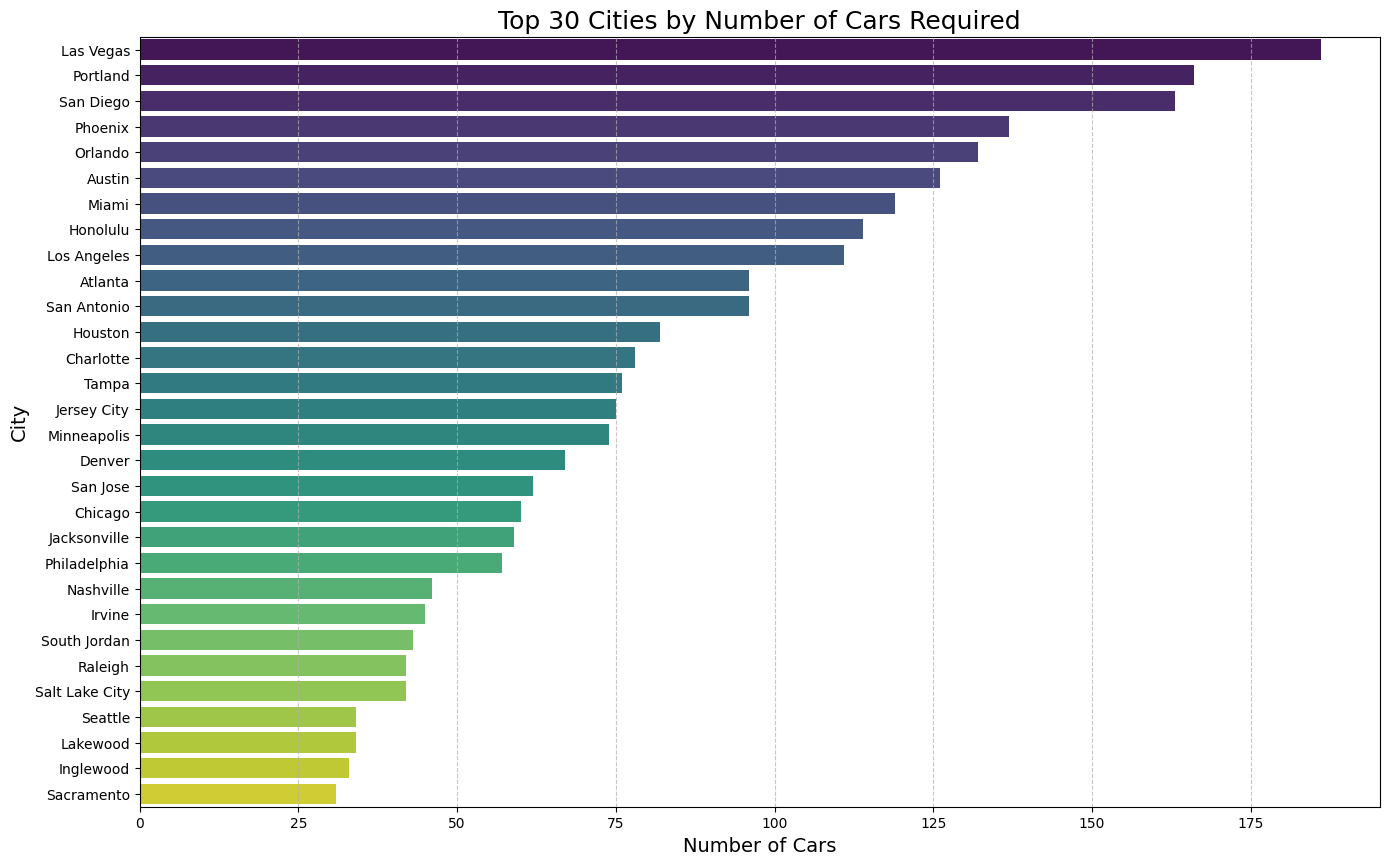

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/CarRentalData_Imputed.csv')

# Set the figure size for the plot
plt.figure(figsize=(16, 10))  # Increased figure size for better visibility

# Get the top 30 cities by count of cars
top_cities = df['location.city'].value_counts().nlargest(30)

# Create a count plot for the top 30 cities
sns.countplot(
    y='location.city',  # Use the city column for the y-axis
    data=df[df['location.city'].isin(top_cities.index)],  # Filter the DataFrame for top 30 cities
    order=top_cities.index,  # Order by frequency of cities
    palette='viridis'  # Use a different color palette for variety
)

# Set the title and labels
plt.title('Top 30 Cities by Number of Cars Required', fontsize=18)  # Increased title font size
plt.xlabel('Number of Cars', fontsize=14)  # Increased x-label font size
plt.ylabel('City', fontsize=14)  # Increased y-label font size

# Display the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Optional: Add grid for better readability
plt.show()


<ipython-input-23-f7e922806620>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


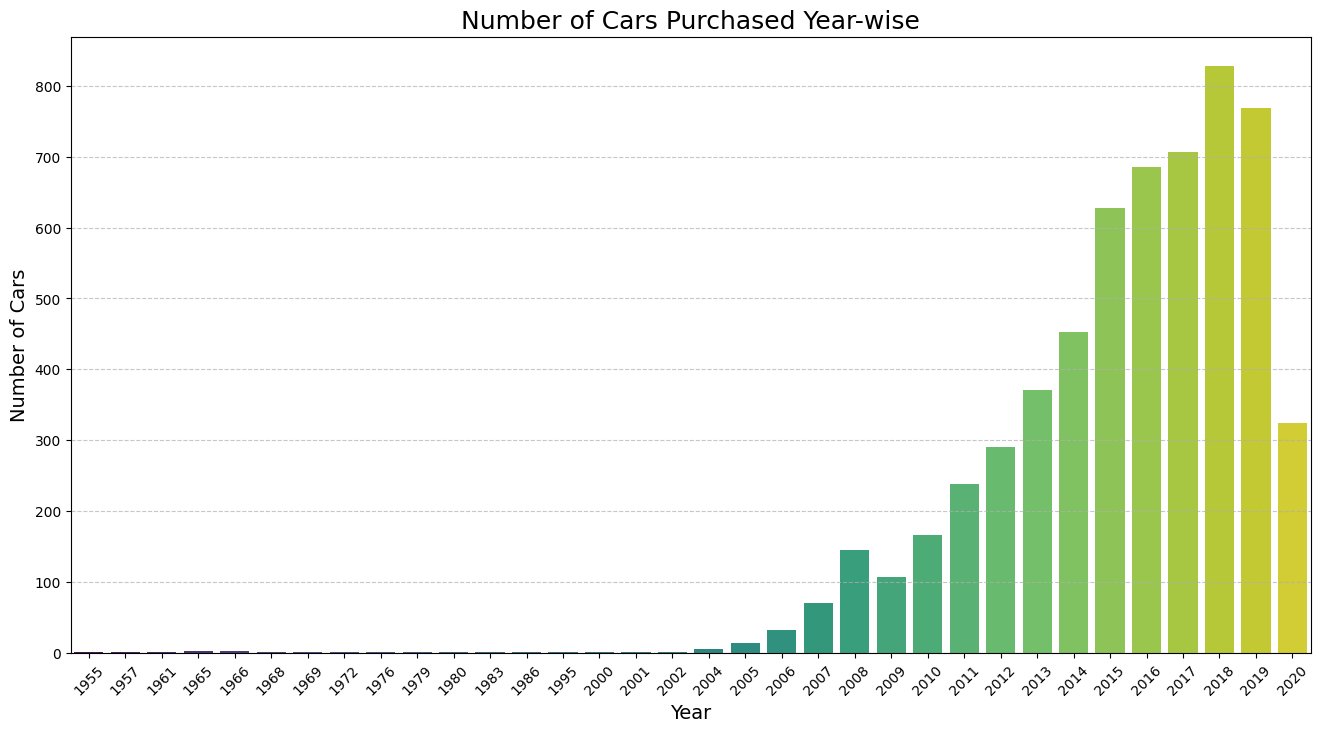

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(16, 8))

# Create a count plot for the number of cars required year-wise using vehicle.year
sns.countplot(
    x='vehicle.year',  # Use the vehicle year column for the x-axis
    data=df,  # Specify the DataFrame
    palette='viridis'  # Use a different color palette for variety
)

# Set the title and labels
plt.title('Number of Cars Purchased Year-wise', fontsize=18)  # Increased title font size
plt.xlabel('Year', fontsize=14)  # Increased x-label font size
plt.ylabel('Number of Cars', fontsize=14)  # Increased y-label font size

# Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

# GROUPED DATA ANALYSIS

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the grouped dataset
grouped_df = pd.read_csv('/content/grouped_data.csv')

# Identify categorical columns
categorical_cols = ['fuelType', 'location.state', 'vehicle.make', 'vehicle.type']

# Print top 5 rows before label encoding
print("Top 5 rows before label encoding:")
print(grouped_df.head())

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
df = grouped_df.copy()  # Create a copy of the original dataframe
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Print top 5 rows after label encoding
print("\nTop 5 rows after label encoding:")
print(df.head())

# Save the DataFrame after label encoding
df.to_csv('/content/grouped_data_encoded.csv', index=False)


Top 5 rows before label encoding:
  fuelType location.state   vehicle.make vehicle.type  renterTripsTaken  \
0   DIESEL             AK           Audi          suv                 3   
1   DIESEL             AL  Mercedes-Benz          van                 6   
2   DIESEL             AZ           Audi          suv                14   
3   DIESEL             CA            BMW          car                17   
4   DIESEL             CA            BMW          suv                91   

     rating  rate.daily  
0  5.000000   85.000000  
1  5.000000  133.000000  
2  4.920000   62.000000  
3  5.000000   90.000000  
4  4.936667   90.333333  

Top 5 rows after label encoding:
   fuelType  location.state  vehicle.make  vehicle.type  renterTripsTaken  \
0         0               0             4             2                 3   
1         0               1            34             4                 6   
2         0               3             4             2                14   
3         0      

<ipython-input-42-99aa6f0759c3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_df, x='vehicle.type', y='renterTripsTaken', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: Whe

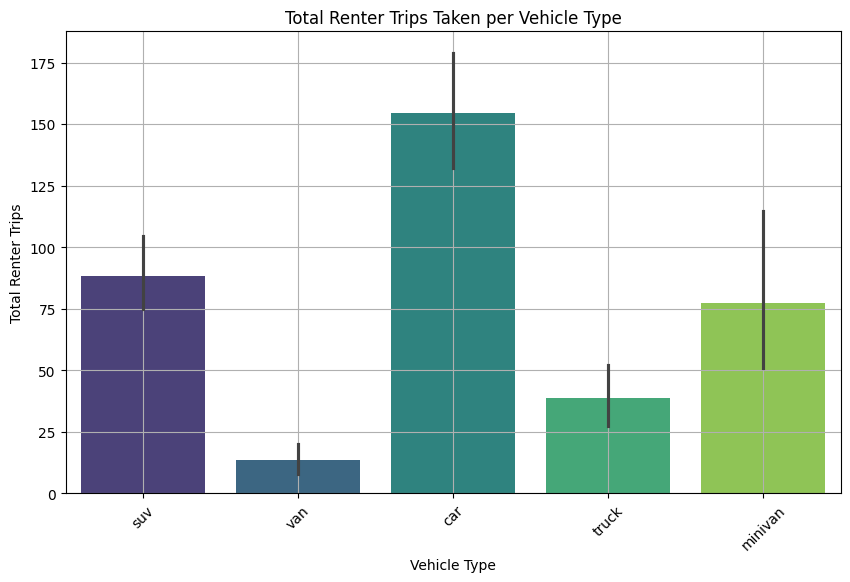

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for total renter trips taken per vehicle type
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='vehicle.type', y='renterTripsTaken', palette='viridis')
plt.title('Total Renter Trips Taken per Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Renter Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-17-e2340a8d2cf4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_df, x='fuelType', y='rate.daily', palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

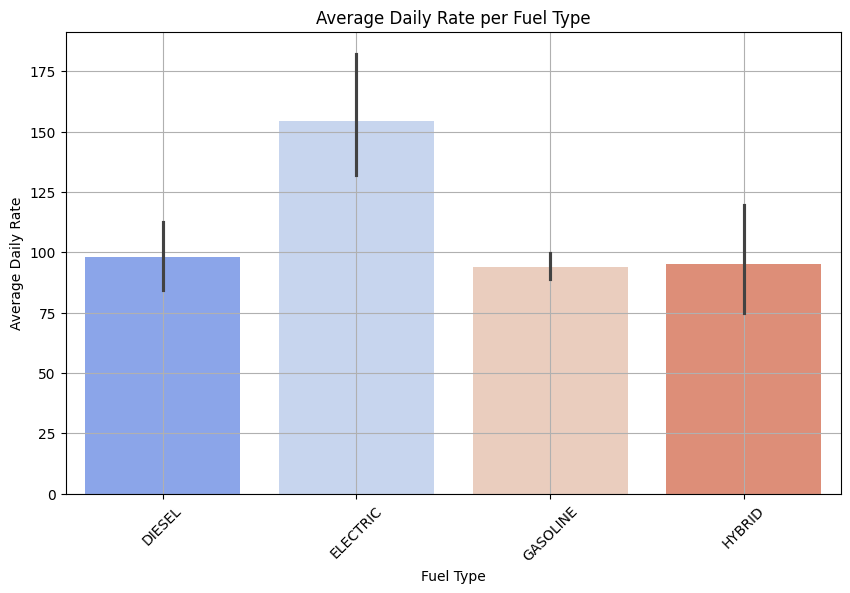

In [ ]:
# Bar plot for average daily rate per fuel type
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='fuelType', y='rate.daily', palette='coolwarm')
plt.title('Average Daily Rate per Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-18-969dd4bbc445>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_df, x='vehicle.make', y='rating', palette='Set1')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wi

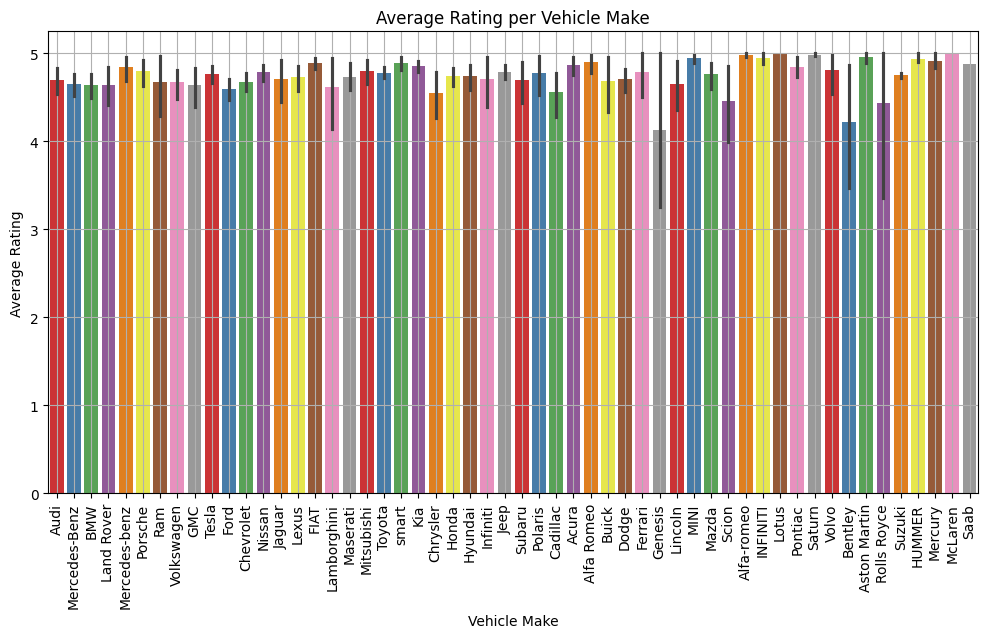

In [ ]:
# Bar plot for average rating per vehicle make
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='vehicle.make', y='rating', palette='Set1')
plt.title('Average Rating per Vehicle Make')
plt.xlabel('Vehicle Make')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


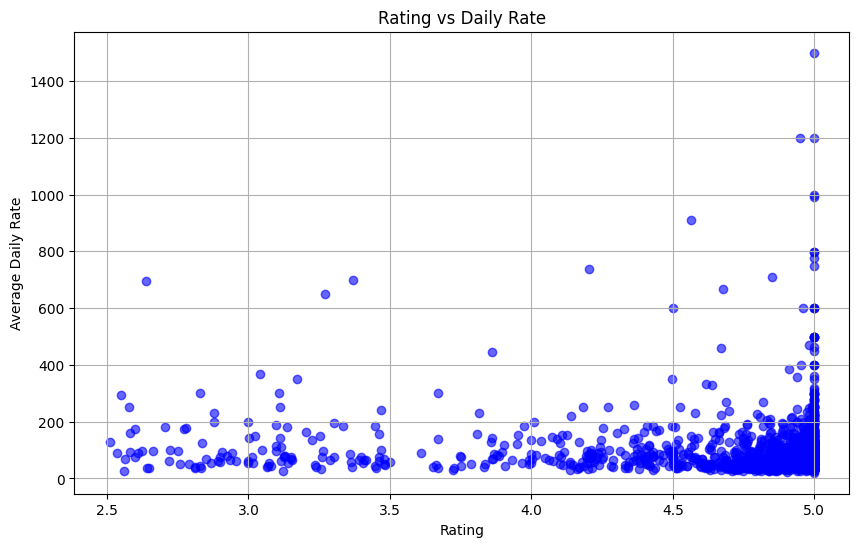

In [ ]:
# Scatter plot for rating vs daily rate
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['rating'], grouped_df['rate.daily'], alpha=0.6, color='b')
plt.title('Rating vs Daily Rate')
plt.xlabel('Rating')
plt.ylabel('Average Daily Rate')
plt.grid(True)
plt.show()


<ipython-input-25-b5bc212a9dbc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=grouped_df, x='vehicle.type', y='rate.daily', palette='Set3')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

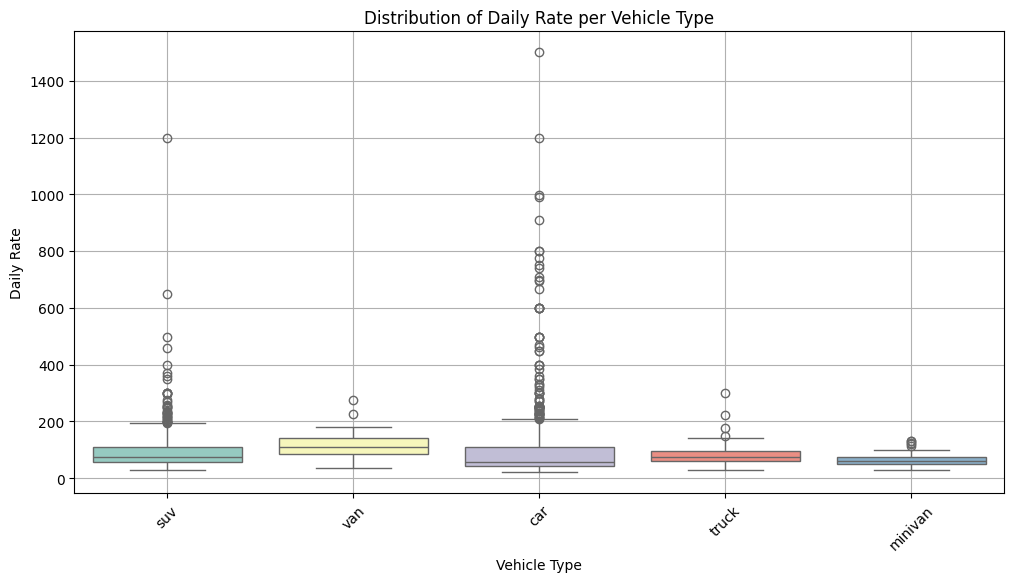

In [ ]:
# Box plot for distribution of daily rate per vehicle type
plt.figure(figsize=(12, 6))
sns.boxplot(data=grouped_df, x='vehicle.type', y='rate.daily', palette='Set3')
plt.title('Distribution of Daily Rate per Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Daily Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-26-b2d05fccc482>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_df, x='location.state', y='rate.daily', palette='Spectral')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When g

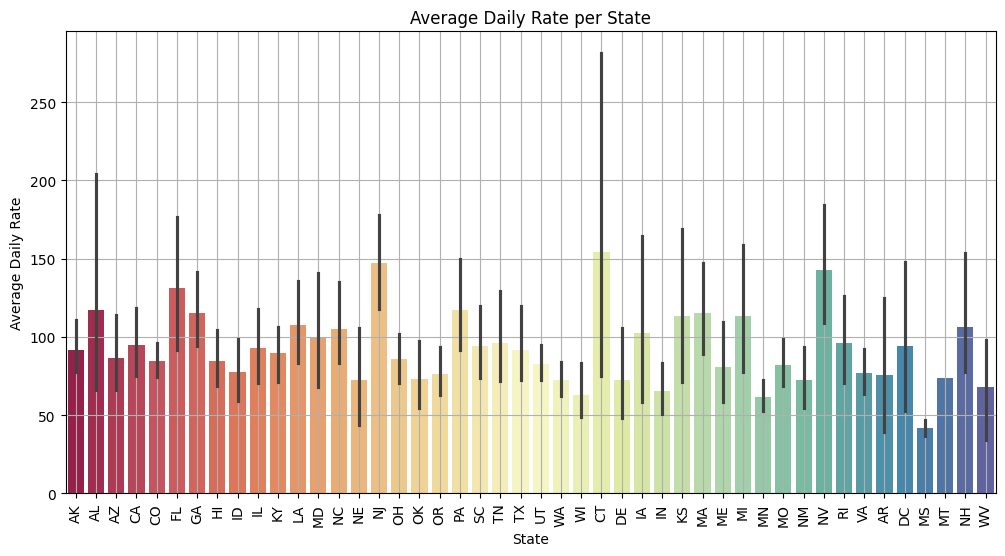

In [ ]:
# Bar plot for average daily rate per state
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='location.state', y='rate.daily', palette='Spectral')
plt.title('Average Daily Rate per State')
plt.xlabel('State')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


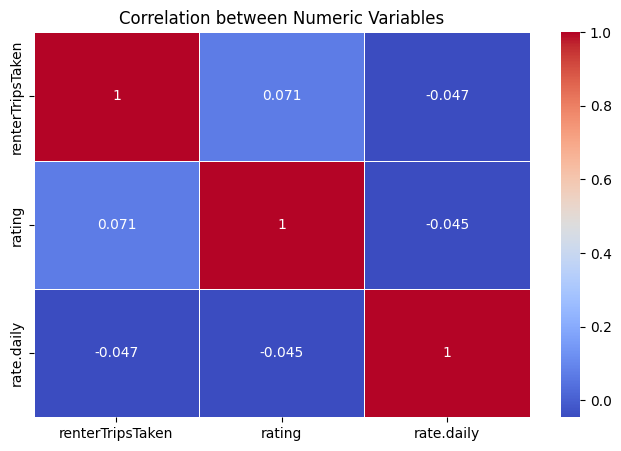

In [ ]:
# Compute the correlation matrix
corr = grouped_df[['renterTripsTaken', 'rating', 'rate.daily']].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Numeric Variables')
plt.show()


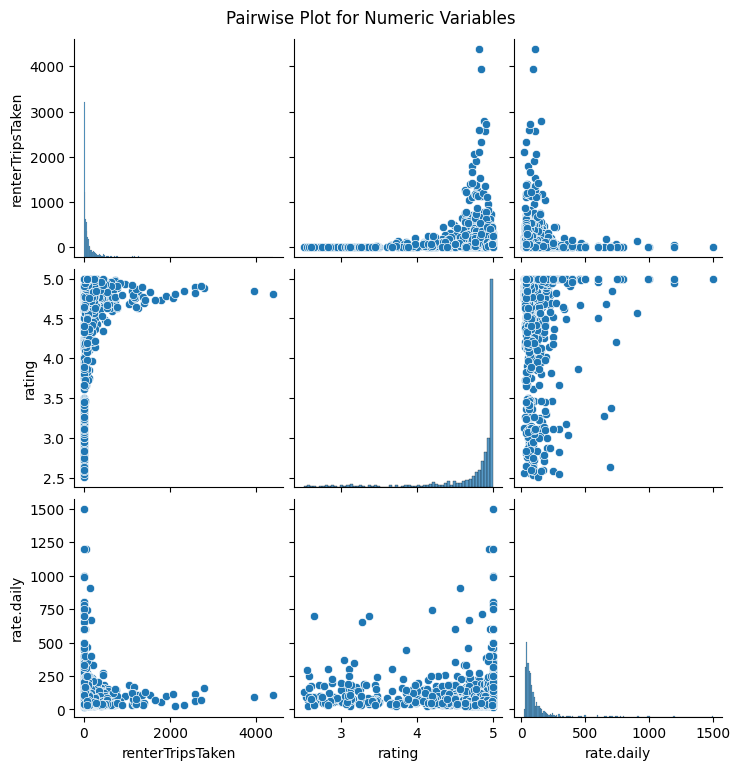

In [ ]:
# Pair plot for numeric variables
sns.pairplot(grouped_df[['renterTripsTaken', 'rating', 'rate.daily']])
plt.suptitle('Pairwise Plot for Numeric Variables', y=1.02)
plt.show()


<ipython-input-29-9a51c79a32b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_df, x='fuelType', y='rating', palette='rocket')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with

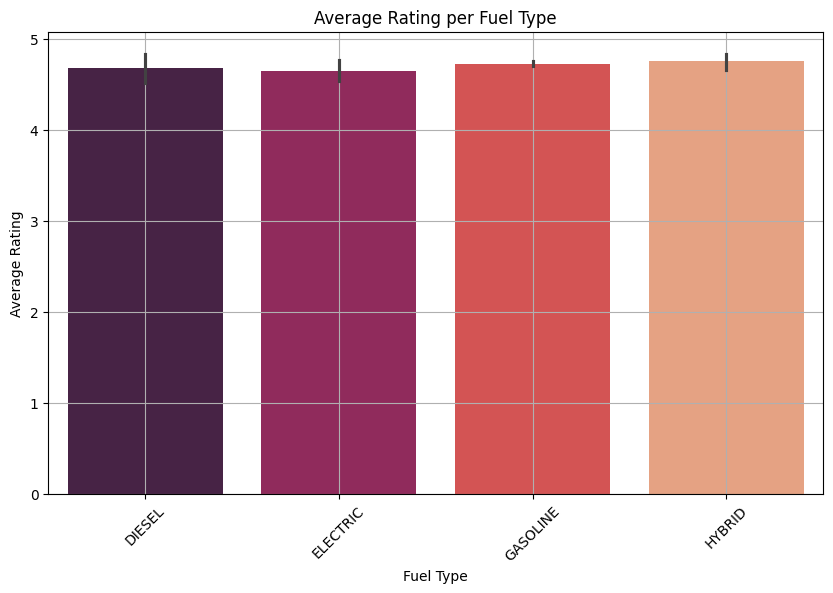

In [ ]:
# Bar plot for average rating per fuel type
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='fuelType', y='rating', palette='rocket')
plt.title('Average Rating per Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


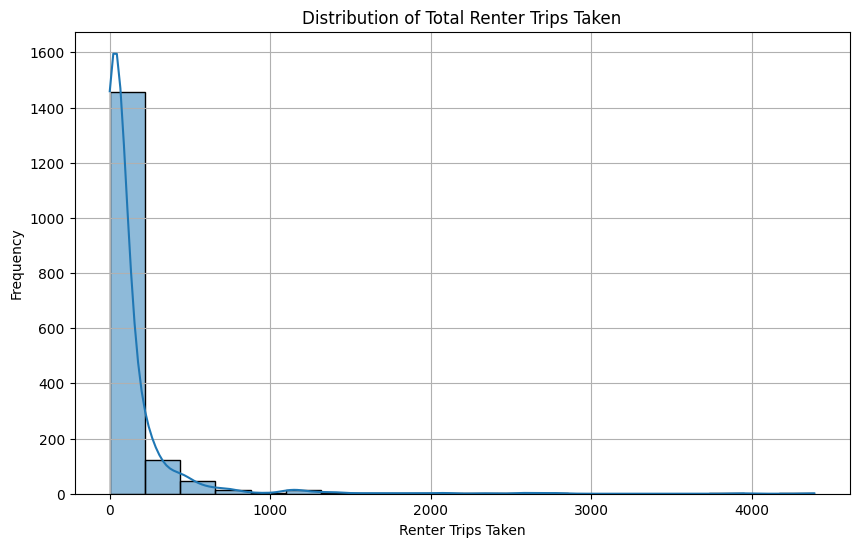

In [ ]:
# Histogram for distribution of renter trips taken
plt.figure(figsize=(10, 6))
sns.histplot(grouped_df['renterTripsTaken'], bins=20, kde=True)
plt.title('Distribution of Total Renter Trips Taken')
plt.xlabel('Renter Trips Taken')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# MODEL

Mean Squared Error: 4803.52
Root Mean Squared Error: 69.31

Specified Hyperparameters for XGBoost model:
n_estimators: 100
max_depth: 5
learning_rate: 0.1
subsample: 0.8
colsample_bytree: 0.8


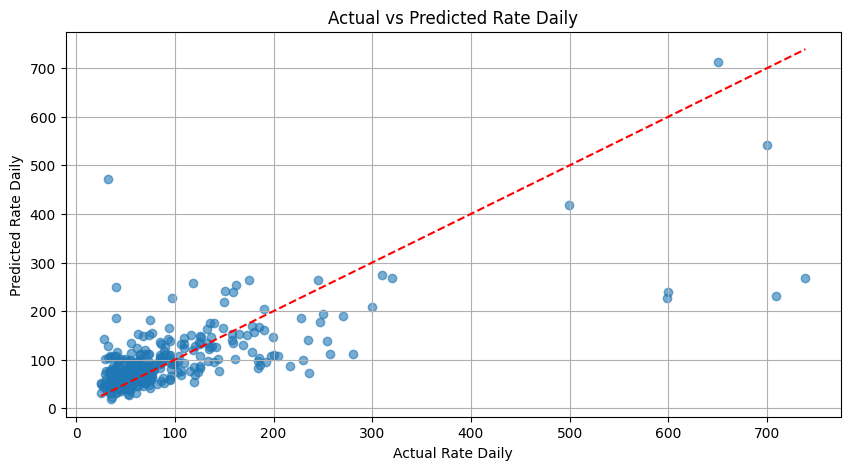

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the grouped dataset
grouped_df = pd.read_csv('/content/grouped_data_encoded.csv')

# Step 1: Prepare the dataset
# Define the features (X) and target variable (y)
X = grouped_df.drop(columns=['rate.daily'])
y = grouped_df['rate.daily']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the XGBoost model with standard hyperparameter values
model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Calculate RMSE and MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# Step 8: Print specified XGBoost hyperparameters
param_grid = [
    'n_estimators',
    'max_depth',
    'learning_rate',
    'subsample',
    'colsample_bytree'
]

print("\nSpecified Hyperparameters for XGBoost model:")
for param in param_grid:
    value = model.get_params().get(param, 'Not Set')
    print(f"{param}: {value}")

# Step 7: Visualize the results
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Rate Daily')
plt.ylabel('Predicted Rate Daily')
plt.title('Actual vs Predicted Rate Daily')
plt.grid()
plt.show()


In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Load your grouped dataset
grouped_df = pd.read_csv('/content/grouped_data_encoded.csv')



# Features and target variable
X = grouped_df .drop(columns=['rate.daily'])
y =grouped_df ['rate.daily']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
xgb_model = XGBRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

# Print some predicted vs actual values
predicted_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predicted_vs_actual.head())


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Mean Squared Error: 3456.0868632247
Root Mean Squared Error: 58.788492608883075
Mean Absolute Error: 35.16094854316648
      Actual   Predicted
940    700.0  607.983582
986     72.0   96.161324
405    709.5  229.267548
721     37.5   46.495331
1610    46.0   77.645500


      Actual   Predicted
940    700.0  607.983582
986     72.0   96.161324
405    709.5  229.267548
721     37.5   46.495331
1610    46.0   77.645500


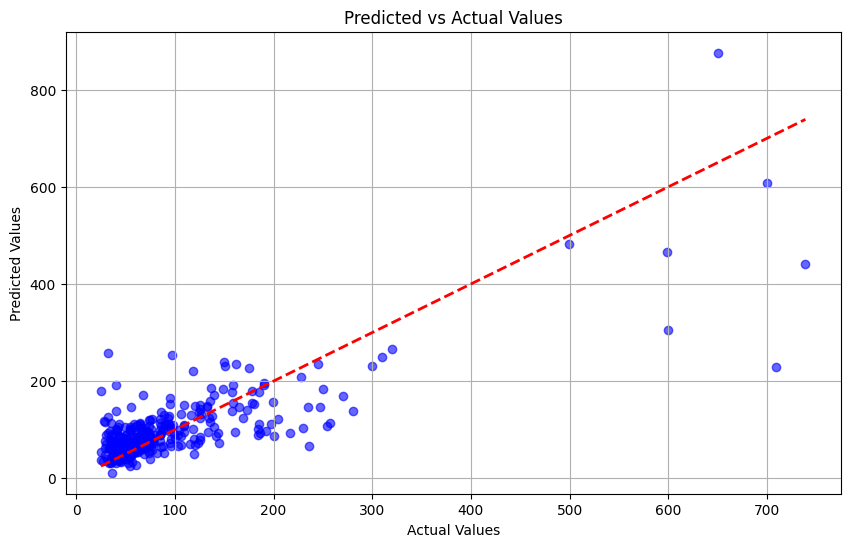

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Print some predicted vs actual values
predicted_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predicted_vs_actual.head())

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(predicted_vs_actual['Actual'], predicted_vs_actual['Predicted'], alpha=0.6, color='b')
plt.plot([predicted_vs_actual['Actual'].min(), predicted_vs_actual['Actual'].max()],
         [predicted_vs_actual['Actual'].min(), predicted_vs_actual['Actual'].max()],
         color='red', linestyle='--', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Load your grouped dataset
df = pd.read_csv('/content/grouped_data_encoded.csv')


# Features and target variable
X = df.drop(columns=['rate.daily'])
y = df['rate.daily']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

# Print some predicted vs actual values
predicted_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predicted_vs_actual.head())


Mean Squared Error: 6637.2094776208205
Root Mean Squared Error: 81.4690706809696
Mean Absolute Error: 43.54689693512864
      Actual   Predicted
940    700.0  377.710000
986     72.0   65.972667
405    709.5  125.541695
721     37.5   50.262738
1610    46.0   70.370000


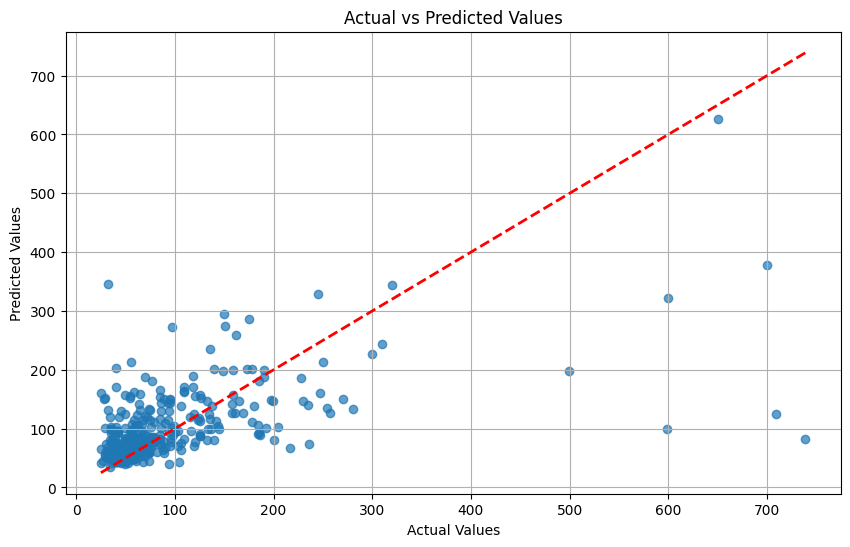

In [ ]:
# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid()
plt.show()